<a href="https://www.kaggle.com/code/andrewbaum/biodiversity-data-exploration-and-visualization?scriptVersionId=119896768" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization
import matplotlib.pyplot as plt #data plotting
import plotly.express as px #geographic visualizations
import plotly.graph_objects as go #geographic visualizations

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/park-biodiversity/species.csv
/kaggle/input/park-biodiversity/parks.csv


In [2]:
parks = pd.read_csv("../input/park-biodiversity/parks.csv")
species = pd.read_csv("../input/park-biodiversity/species.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
parks.head()

,Park Code,Park Name,State,Acres,Latitude,Longitude
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21
1,ARCH,Arches National Park,UT,76519,38.68,-109.57
2,BADL,Badlands National Park,SD,242756,43.75,-102.50
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08


In [4]:
species.head()

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,NaN
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,NaN
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,NaN


In [5]:
parks.shape

(56, 6)

In [6]:
species.shape

(119248, 14)

In [7]:
species.isna().sum()

Species ID                  0
Park Name                   0
Category                    0
Order                    1472
Family                   1512
Scientific Name             0
Common Names                0
Record Status               0
Occurrence              20142
Nativeness              25045
Abundance               42942
Seasonality             99091
Conservation Status    114530
Unnamed: 13            119243
dtype: int64

All but 5 values of "Unnamed: 13" have NA values, thus this columnn will be dropped.

In [8]:
#drop empty column
species.drop(["Species ID","Unnamed: 13"], axis=1, inplace=True)

In [9]:
species.head()

,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status
0,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN
1,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN
2,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern
3,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered
4,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN


In [10]:
parks.info

<bound method DataFrame.info of    Park Code                                       Park Name       State  \
0       ACAD                            Acadia National Park          ME   
1       ARCH                            Arches National Park          UT   
2       BADL                          Badlands National Park          SD   
3       BIBE                          Big Bend National Park          TX   
4       BISC                          Biscayne National Park          FL   
5       BLCA      Black Canyon of the Gunnison National Park          CO   
6       BRCA                      Bryce Canyon National Park          UT   
7       CANY                       Canyonlands National Park          UT   
8       CARE                      Capitol Reef National Park          UT   
9       CAVE                  Carlsbad Caverns National Park          NM   
10      CHIS                   Channel Islands National Park          CA   
11      CONG                          Congaree National 

In [11]:
species.info

<bound method DataFrame.info of                    Park Name        Category          Order          Family  \
0       Acadia National Park          Mammal   Artiodactyla        Cervidae   
1       Acadia National Park          Mammal   Artiodactyla        Cervidae   
2       Acadia National Park          Mammal      Carnivora         Canidae   
3       Acadia National Park          Mammal      Carnivora         Canidae   
4       Acadia National Park          Mammal      Carnivora         Canidae   
...                      ...             ...            ...             ...   
119243    Zion National Park  Vascular Plant      Solanales      Solanaceae   
119244    Zion National Park  Vascular Plant        Vitales        Vitaceae   
119245    Zion National Park  Vascular Plant        Vitales        Vitaceae   
119246    Zion National Park  Vascular Plant  Zygophyllales  Zygophyllaceae   
119247    Zion National Park  Vascular Plant  Zygophyllales  Zygophyllaceae   

               Scie

In [12]:
#merge the datasets
park_species = pd.merge(parks, species, on="Park Name")

In [13]:
park_species.head()

,Park Code,Park Name,State,Acres,Latitude,Longitude,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN
1,ACAD,Acadia National Park,ME,47390,44.35,-68.21,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN
2,ACAD,Acadia National Park,ME,47390,44.35,-68.21,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern
3,ACAD,Acadia National Park,ME,47390,44.35,-68.21,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered
4,ACAD,Acadia National Park,ME,47390,44.35,-68.21,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN


# Exploring the dataset more deeply

**Entries per category**

In [14]:
species['Category'].value_counts()

Vascular Plant         65221
Bird                   14601
Insect                 14349
Fungi                   6203
Nonvascular Plant       4278
Fish                    3956
Mammal                  3867
Invertebrate            1566
Reptile                 1343
Algae                    976
Slug/Snail               787
Spider/Scorpion          776
Amphibian                743
Crab/Lobster/Shrimp      582
Name: Category, dtype: int64

<AxesSubplot:xlabel='Count', ylabel='Category'>

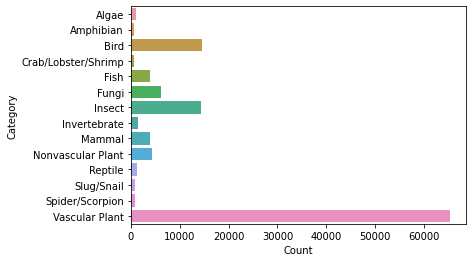

In [15]:
#shown as a graph
Cat_Count = pd.DataFrame(park_species.groupby("Category").size(), columns=["Count"])
Cat_Count = Cat_Count.reset_index()
sns.barplot(y=Cat_Count["Category"], x= Cat_Count["Count"])

Entries in the dataset are overwhelmingly for vascular plants, the least entries are for Crab/Lobster/Shrimp. The entries don't appear to be representative of the natural abundance and diversity of each category, and are likely related to how the data was recorded (e.g. it's unlikely there are so few algae species present, and likely there are simply less entries becuase it's more difficult to classify algae species)

**Datapoints per park**

In [16]:
species['Park Name'].value_counts()

Great Smoky Mountains National Park               6623
Redwood National Park                             6310
Shenandoah National Park                          4655
Death Valley National Park                        4439
Yellowstone National Park                         3966
Crater Lake National Park                         3760
North Cascades National Park                      3363
Hawaii Volcanoes National Park                    3298
Rocky Mountain National Park                      3152
Great Basin National Park                         2653
Grand Canyon National Park                        2622
Haleakala National Park                           2580
Glacier National Park                             2556
Mammoth Cave National Park                        2499
Congaree National Park                            2321
Joshua Tree National Park                         2294
Big Bend National Park                            2269
Yosemite National Park                            2088
Everglades

**Total orders in the dataset**

In [17]:
species['Order'].unique()

array(['Artiodactyla', 'Carnivora', 'Chiroptera', 'Lagomorpha',
       'Rodentia', 'Soricomorpha', 'Accipitriformes', 'Anseriformes',
       'Apodiformes', 'Caprimulgiformes', 'Charadriiformes',
       'Columbiformes', 'Coraciiformes', 'Cuculiformes', 'Falconiformes',
       'Galliformes', 'Gaviiformes', 'Gruiformes', 'Passeriformes',
       'Pelecaniformes', 'Piciformes', 'Podicipediformes',
       'Procellariiformes', 'Strigiformes', 'Suliformes', 'Squamata',
       'Testudines', 'Anura', 'Caudata', 'Anguilliformes',
       'Atheriniformes', 'Clupeiformes', 'Cypriniformes',
       'Cyprinodontiformes', 'Esociformes', 'Gadiformes',
       'Gasterosteiformes', 'Osmeriformes', 'Perciformes',
       'Pleuronectiformes', 'Salmoniformes', 'Siluriformes', nan,
       'Acorales', 'Alismatales', 'Apiales', 'Aquifoliales',
       'Asparagales', 'Asterales', 'Boraginales', 'Brassicales',
       'Caryophyllales', 'Celastrales', 'Ceratophyllales', 'Commelinales',
       'Cornales', 'Cucurbitales'

In [18]:
#total number of species in the dataset
orders = len(species['Order'].unique())
print("Number of orders:", orders)

Number of orders: 555


**Total families in the dataset**

In [19]:
species['Family'].unique()

array(['Cervidae', 'Canidae', 'Felidae', ..., 'Pseudeurotiaceae',
       'Cunninghamellaceae', 'Saccharomycetaceae'], dtype=object)

In [20]:
family = len(species['Family'].unique())
print("Number of families:", family)

Number of families: 2333


In [21]:
species['Family'].value_counts()

Asteraceae            8843
Poaceae               6709
Cyperaceae            3585
Fabaceae              3359
Brassicaceae          2644
                      ... 
Luidiidae                1
Platyarthridae           1
Ophiuridae               1
Ophiothricidae           1
Saccharomycetaceae       1
Name: Family, Length: 2332, dtype: int64

Asteraceae (a family of flowering plants, like daisies) is the family with the most entries, followed by Poaceae (a family of grasses)

In [22]:
species['Record Status'].value_counts()

Approved                86254
In Review               32937
None                        6
 Willowherb                 1
 Devil's Shoelaces          1
 Verdolagas                 1
 Chico                      1
 Skyrocket Gilia            1
 Grass-Leaf Loco            1
 Golden Pea                 1
 Storksbill                 1
 Cranesbill                 1
 Speedwell                  1
 Common Mullein             1
 Downy Chess                1
 Wiregrass                  1
 Leather Flower             1
 Shadbush                   1
 Wild Rose                  1
 Skunkbush                  1
 Clover Bush                1
 Kinnikinnick               1
 Filaree                    1
 Liver Leaf*                1
 *                          1
 Whortleberry               1
 Claret Cup                 1
 Goosefoot                  1
 Cenizo                     1
 Bluebell                   1
 Purple Cockle              1
 Dames Rocket               1
 Manati                     1
 Ranchers'

This column has erroneous data

In [23]:
species['Occurrence'].value_counts()

Present                            83278
Not Confirmed                      11958
Not Present (False Report)          2072
Not Present (Historical Report)     1310
Not Present                          431
Approved                              51
In Review                              6
Name: Occurrence, dtype: int64

In [24]:
species['Nativeness'].value_counts()

Native           75950
Not Native       11095
Unknown           7101
Present             53
Not Confirmed        4
Name: Nativeness, dtype: int64

In [25]:
species['Abundance'].value_counts()

Unknown       28119
Uncommon      18779
Common        12913
Rare          10768
Occasional     3312
Abundant       2365
Native           40
Not Native       10
Name: Abundance, dtype: int64

In [26]:
species['Seasonality'].value_counts()

Breeder                                 12214
Resident                                 3215
Migratory                                2825
Vagrant                                  1660
Breeder, Winter                            64
Rare                                       35
Summer                                     26
Migratory, Winter                          24
Winter                                     20
Breeder, Resident                          20
Breeder, Migratory                         13
Resident, Winter                            9
Uncommon                                    5
Common                                      4
Migratory, Vagrant                          4
Summer, Vagrant                             3
Breeder, Resident, Summer                   3
Migratory, Summer                           3
Unknown                                     3
Resident, Summer                            2
Breeder, Summer                             2
Breeder, Resident, Migratory, Summ

In [27]:
species['Conservation Status'].value_counts()

Species of Concern     3843
Endangered              374
Under Review            194
Threatened              184
In Recovery              77
Proposed Endangered      24
Proposed Threatened       7
Breeder                   7
Resident                  5
Migratory                 2
Extinct                   1
Name: Conservation Status, dtype: int64

There's a single entry for extinct species and two entries for "migratory".

In [28]:
species[species['Conservation Status'] == "Extinct"]

,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status
23237,Cuyahoga Valley National Park,Fish,Perciformes,Percidae,Stizostedion vitreum glaucum,Blue Pike,Approved,Not Present (False Report),Not Native,NaN,NaN,Extinct


In [29]:
species[species['Conservation Status'] == "Migratory"]

,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status
44600,Great Sand Dunes National Park and Preserve,Mammal,Artiodactyla,Cervidae,Cervus elaphus,American Elk,Wapiti,Approved,Present,Native,Rare,Migratory
44610,Great Sand Dunes National Park and Preserve,Mammal,Carnivora,Mustelidae,Mustela erminea,Ermine,Short-Tailed Weasel,Approved,Present,Native,Rare,Migratory


In [30]:
#max recorded category for each park name
species.groupby('Park Name')['Category'].max() 

Park Name
Acadia National Park                              Vascular Plant
Arches National Park                              Vascular Plant
Badlands National Park                            Vascular Plant
Big Bend National Park                            Vascular Plant
Biscayne National Park                            Vascular Plant
Black Canyon of the Gunnison National Park        Vascular Plant
Bryce Canyon National Park                        Vascular Plant
Canyonlands National Park                         Vascular Plant
Capitol Reef National Park                        Vascular Plant
Carlsbad Caverns National Park                    Vascular Plant
Channel Islands National Park                     Vascular Plant
Congaree National Park                            Vascular Plant
Crater Lake National Park                         Vascular Plant
Cuyahoga Valley National Park                     Vascular Plant
Death Valley National Park                        Vascular Plant
Denali National

For every park, the category with the most entries is vascular plant. This isn't surprising, because vascular plants represent the vast majority of entries in the dataset. 

# Visualizing the Data

Now we will create visualizations of various portions of the data. For national parks and the available data, it's interesting to explore factors like the seasonality of species, abundance, as well as various factors which indicate the health of each park. 

Seasonality was only recorded for a portion of the data, as it only makes sense to record for certain types of species (i.e. not for vascular plants). It's interesting to look at how the remaining categories of species are represented across different seasonailities. 

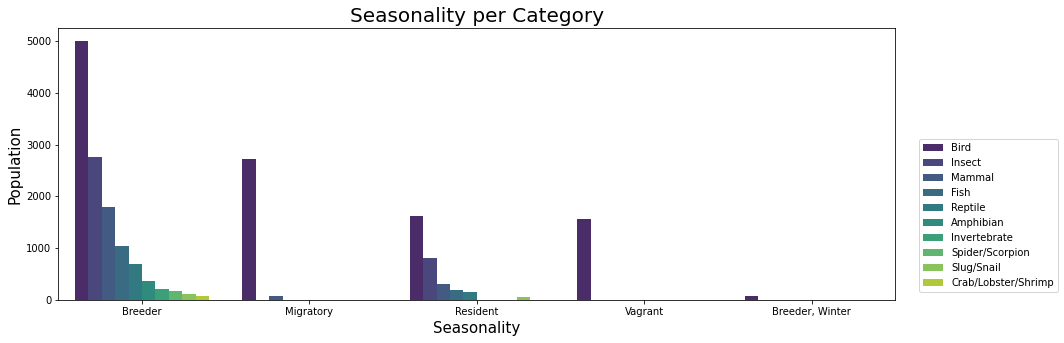

In [31]:
plt.figure(figsize=(15,5))
seasons = pd.DataFrame(species.groupby(["Seasonality", "Category"]).size().reset_index())
seasons.rename(columns={0:"Counts"}, inplace=True)
seasons = seasons.nlargest(20, "Counts")
sns.barplot(x="Seasonality", y="Counts", hue="Category", data=seasons, palette="viridis")
plt.title("Seasonality per Category", fontsize=20)
plt.ylabel("Population", fontsize=15)
plt.xlabel("Seasonality", fontsize=15)
plt.legend(loc="lower right", bbox_to_anchor=(1.2,0.01))

The species for which seasonility was recorded are overwhelmingly "breeders", or species which only breed during specific seasons. Unsurprisingly, the majority of migratory species are birds, although there are migratory mammals. 

The adundance was recorded as 'na' for 42942 datapoints, but it is still interesting to explore for the remainder of the data. 

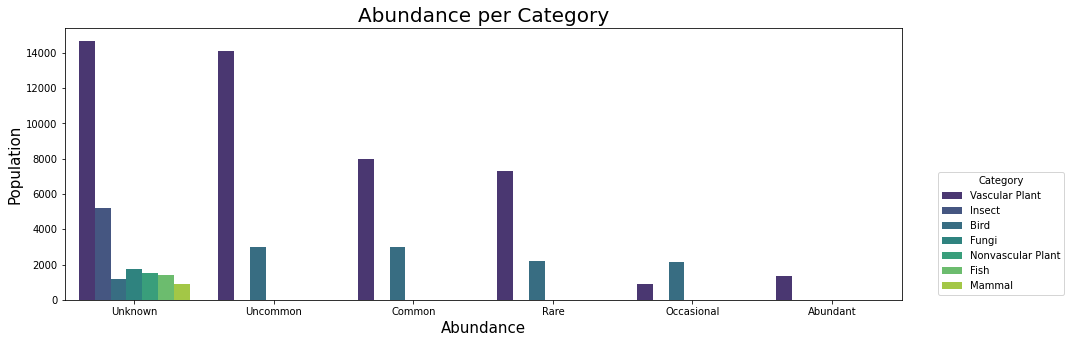

In [32]:
plt.figure(figsize=(15,5))
seasons = pd.DataFrame(species.groupby(["Abundance", "Category"]).size().reset_index())
seasons.rename(columns={0:"Counts"}, inplace=True)
season_smallest = seasons.nsmallest(16, "Counts")
season_biggest = seasons.nlargest(16, "Counts")
sns.barplot(x="Abundance", y="Counts", hue="Category", data=season_biggest, palette="viridis", orient="v")
plt.title("Abundance per Category", fontsize=20)
plt.ylabel("Population", fontsize=15)
plt.xlabel("Abundance", fontsize=15)
plt.legend(loc="lower right", bbox_to_anchor=(1.2, 0), title="Category")

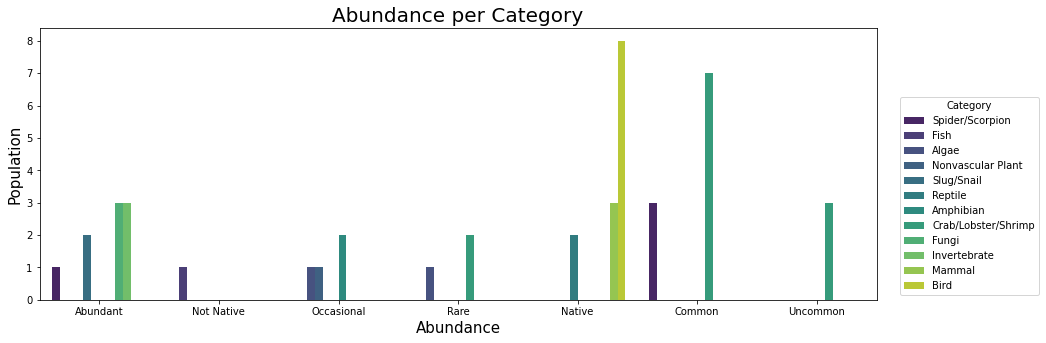

In [33]:
plt.figure(figsize=(15,5))
sns.barplot(x="Abundance", y="Counts", hue="Category", data=season_smallest, palette="viridis", orient="v")
plt.title("Abundance per Category", fontsize=20)
plt.ylabel("Population", fontsize=15)
plt.xlabel("Abundance", fontsize=15)
plt.legend(loc="lower right", bbox_to_anchor=(1.2, 0), title="Category")

In [34]:
species.isna().sum()

Park Name                   0
Category                    0
Order                    1472
Family                   1512
Scientific Name             0
Common Names                0
Record Status               0
Occurrence              20142
Nativeness              25045
Abundance               42942
Seasonality             99091
Conservation Status    114530
dtype: int64

Abundance was only recorded for vascular plants and birds, otherwise it was unknown or 'na', or the abundance rating has less than 8 entries. Thus, it's probably not wise to draw many conclusions from the abundance graphs. 
Next we will look at the conservation status instead, to explore how the parks manage conservation of species. First we will look at absolute numbers, and then compare them to a proportional count which takes the size of the park into account. 

In [35]:
#count of each conservation category in each park
conserve_count = species[['Park Name', 'Conservation Status']].groupby(['Park Name', 'Conservation Status']).size()
#Convert to dataframe
conserve_count_df = conserve_count.to_frame().reset_index()
conserve_count_df.columns = ['Park Name', 'Conservation Status', 'Count']

In [36]:
conserve_count_df.sample(10)

,Park Name,Conservation Status,Count
3,Acadia National Park,Threatened,1
202,Olympic National Park,Under Review,5
82,Dry Tortugas National Park,Species of Concern,46
146,Hot Springs National Park,Species of Concern,61
18,Big Bend National Park,Threatened,5
144,Hot Springs National Park,Endangered,4
261,Yosemite National Park,Endangered,4
227,Sequoia and Kings Canyon National Parks,Proposed Threatened,1
106,Grand Canyon National Park,Species of Concern,114
186,Mesa Verde National Park,Species of Concern,78


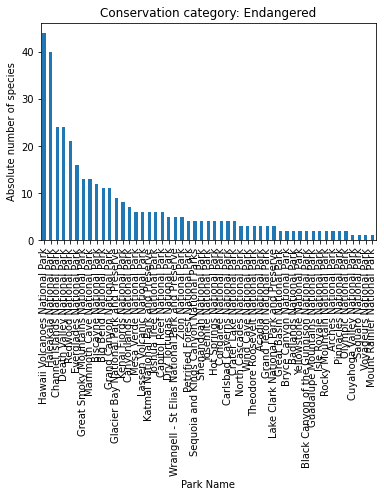

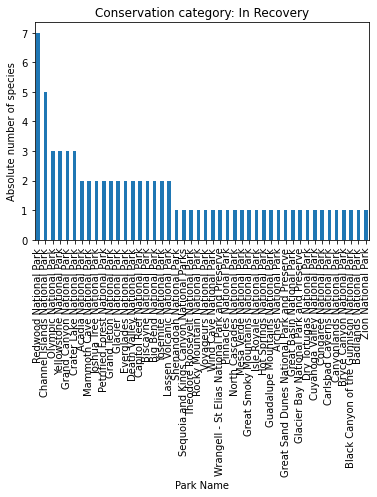

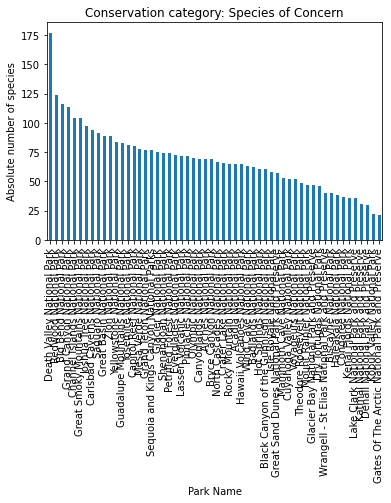

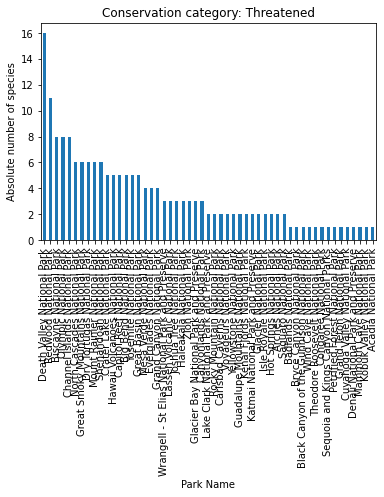

In [37]:
#plotting the absolute numbers
categories = ['Endangered', 'In Recovery', 'Species of Concern', 'Threatened']
for i in categories:
    subset = conserve_count_df[conserve_count_df['Conservation Status'] == i]
    subset.sort_values(by='Count', ascending=False).plot(x='Park Name', y='Count', kind='bar', legend=None)
    plt.ylabel('Absolute number of species')
    plt.title('Conservation category: %s' % (i))
plt.show()

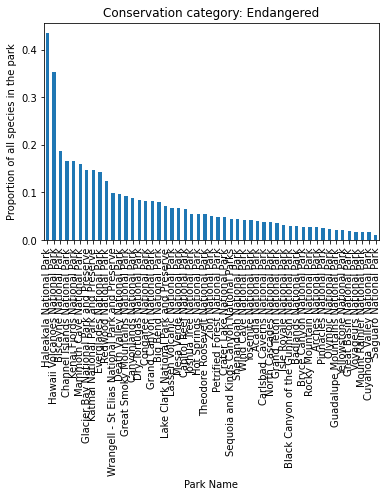

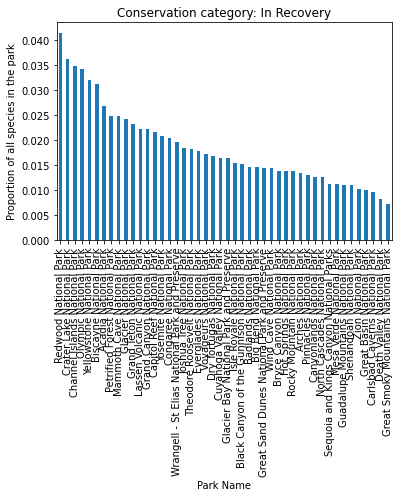

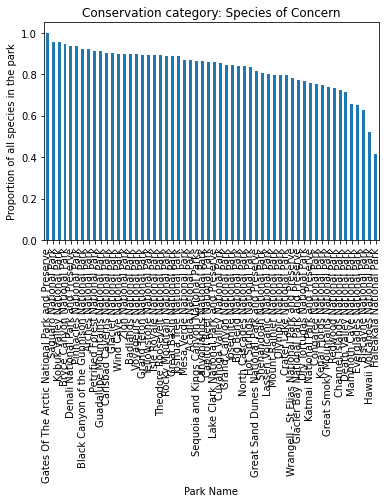

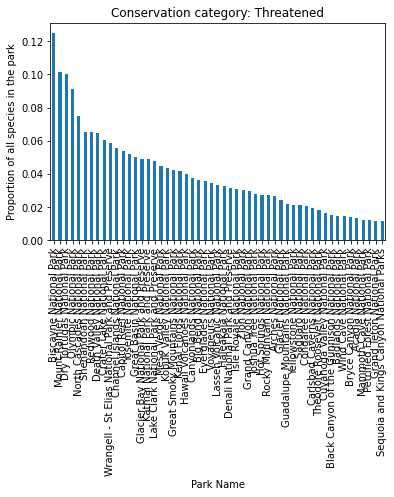

In [38]:
#plotting the proportional numbers
categories = ['Endangered', 'In Recovery', 'Species of Concern', 'Threatened']
#Sum of conservation classes per park
park_sums = conserve_count_df.groupby(['Park Name']).agg('sum').reset_index()
#Create a dictionary with Park and count
park_dict = dict(zip(park_sums['Park Name'], park_sums['Count']))
#divide each conservation category count by the total count
def divide_total(row):
    return row['Count']/(park_dict[row['Park Name']])
#Create new column with proportional count 
conserve_count_df['ProportionalCount'] = conserve_count_df.apply(divide_total, axis=1)
#Plot the results
for i in categories:
    subset = conserve_count_df[conserve_count_df['Conservation Status'] == i]
    subset.sort_values(by='ProportionalCount', ascending=False).plot(x='Park Name', y='ProportionalCount', kind='bar', legend=None)
    plt.ylabel('Proportion of all species in the park')
    plt.title('Conservation category: %s' % (i))
plt.show()

# Looking at Biodiversity

In addition to conservation status, the level of biodiversity in each park is an indicator of ecological health. To explore biodiversity, we first create a count of how many species have been recorded in each park and call it "Biodiversity". Then we look at biodiversity per acre of park, called the "Biodiversity Density".

In [39]:
biodiversity_data = species.groupby("Park Name")["Scientific Name"].count().reset_index(name='Count')
biodiversity_data.head()

,Park Name,Count
0,Acadia National Park,1709
1,Arches National Park,1048
2,Badlands National Park,1389
3,Big Bend National Park,2269
4,Biscayne National Park,1726


In [40]:
#add biodiversity column to the parks dataset
parks["Biodiversity Count"] = biodiversity_data["Count"]
parks.head()

,Park Code,Park Name,State,Acres,Latitude,Longitude,Biodiversity Count
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21,1709
1,ARCH,Arches National Park,UT,76519,38.68,-109.57,1048
2,BADL,Badlands National Park,SD,242756,43.75,-102.50,1389
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25,2269
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08,1726


In [41]:
#create biodiversity density factor in the parks dataset
parks["Biodiversity Density"] = parks["Biodiversity Count"]/parks["Acres"]
parks.head()

,Park Code,Park Name,State,Acres,Latitude,Longitude,Biodiversity Count,Biodiversity Density
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21,1709,0.036062
1,ARCH,Arches National Park,UT,76519,38.68,-109.57,1048,0.013696
2,BADL,Badlands National Park,SD,242756,43.75,-102.50,1389,0.005722
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25,2269,0.002832
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08,1726,0.009981


<AxesSubplot:xlabel='Biodiversity Count', ylabel='Park Name'>

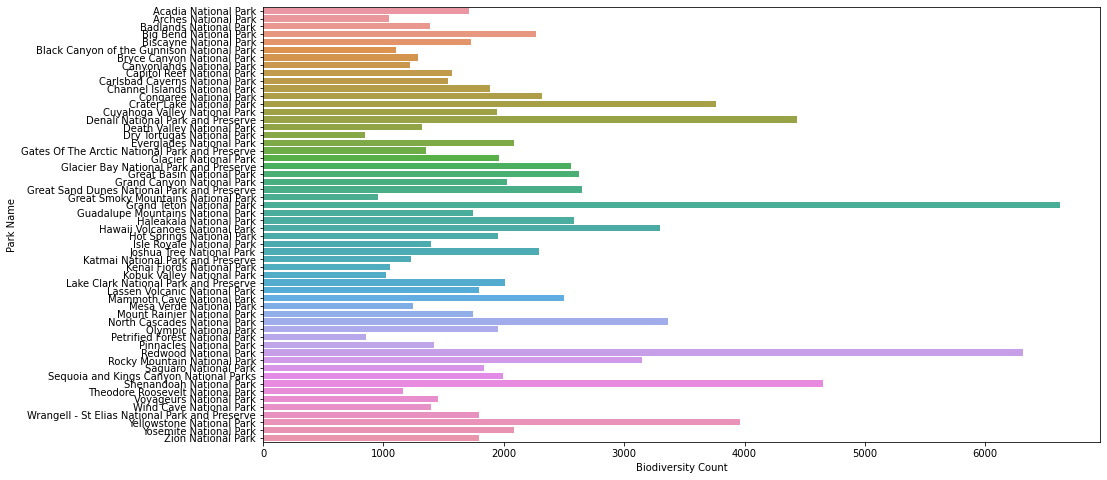

In [42]:
#biodiversity count graph
plt.figure(figsize = (15, 8))
sns.barplot(y=parks["Park Name"], x = parks["Biodiversity Count"])

<AxesSubplot:xlabel='Biodiversity Density', ylabel='Park Name'>

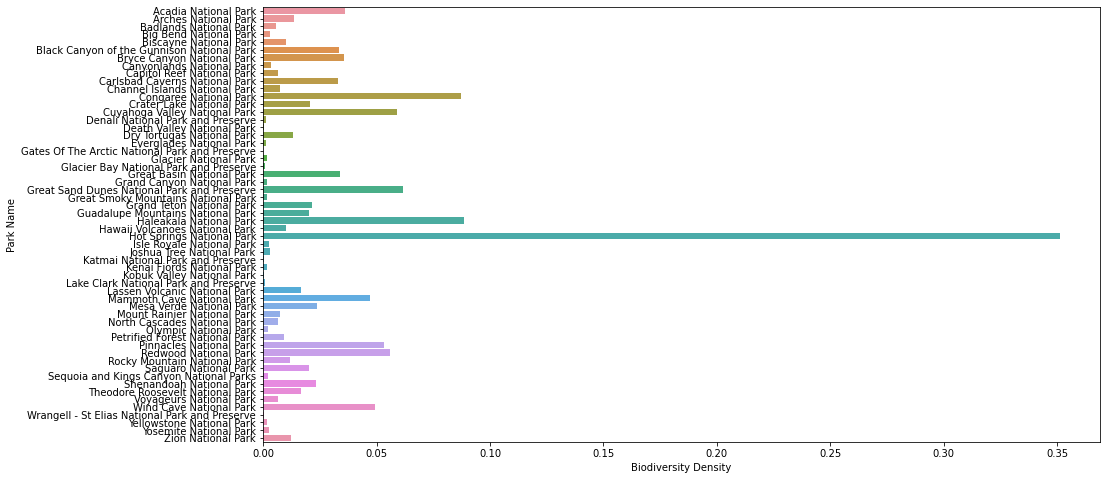

In [43]:
#biodiversity density graph
plt.figure(figsize = (15,8))
sns.barplot(y=parks["Park Name"], x = parks["Biodiversity Density"])

When comparing the total biodiversity to the biodiversity density, there are very different pictures across parks. Perhaps the most surprising is Hot Springs National Park, which has by far the highest biodiversity density, but a fairly average number of total species. It's also rather surprising to see that parks like Grand Teton National Park and Redwood National Park have the highest raw number of species, but when looking at the biodiversity density, they are around (Redwood) or below (Grand Teton) average biodiversity density. Therefore, the total species recorded in each park is not a good indicator of the overall biodiversity. 

In [44]:
#create text for map
parks['text'] = parks['Park Name'] + '<br>' + \
    (parks['Acres']).astype(str) + ' Acres' + '<br>' + \
    (parks['Biodiversity Count']).astype(str)+' Species'

In [45]:
fig = go.Figure()
scale = 8000

fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    lon = parks['Longitude'],
    lat = parks['Latitude'],
    text = parks['text'],
    marker = dict(
        size = parks['Acres']/scale,
        color = parks['Biodiversity Count'],
        line_color='rgb(50,50,50)',
        line_width=1,
        sizemode = 'area',
        colorscale = 'jet',
        cmax = parks['Biodiversity Count'].max(),
        cmin = parks['Biodiversity Count'].min(),
        colorbar = {'title': 'Number of Species'}
        )))


fig.update_layout(
        title_text = 'US National Park Size and Biodiversity',
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()



In this map, the park size is indicated by the circle diameter, while the number of species is indicated by the color. Most of the biggest prks (by acreage) are in Alaska, followed by California. 

In [46]:
fig = go.Figure()
scale = 8000

fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    lon = parks['Longitude'],
    lat = parks['Latitude'],
    text = parks['text'],
    marker = dict(
        size = parks['Biodiversity Density']*scale,
        color = parks['Biodiversity Density'],
        line_color='rgb(50,50,50)',
        line_width=1,
        sizemode = 'area',
        colorscale = 'jet',
        colorbar = {'title': 'Biodiversity Density'}
        )))


fig.update_layout(
        title_text = 'US National Park Biodiversity Density',
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()

In this map, the biodiversity density is indicated by the circle diameter and the color. With this map, it's apparent Hot Springs National Park is by far the most biodiverse park recorded in this dataset. The next most diverse parks are Congaree National Park in South Carolina, and Haleakala National Park in Hawaii. To have a better picture about what's going on with biodiversity and the health of each park, it would be intersting to look at the data over time and see which species are declining or growing in each park. 